In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def load_wine_data(path_to_dir, filename, csv_separator):
    csv_path = os.path.join(path_to_dir, filename)
    return pd.read_csv(csv_path, sep=csv_separator)
#os.path.dirname(path) return the parent directory of the given path
PARENT_DIR = os.path.dirname(os.getcwd())
WINE_DIR = os.path.join(PARENT_DIR, "Data set")
print(PARENT_DIR)
print(WINE_DIR)

D:\studygit1\WineQuality
D:\studygit1\WineQuality\Data set


In [4]:
df_red_wine = load_wine_data(WINE_DIR, "winequality-red.csv", ";")
df_white_wine = load_wine_data(WINE_DIR, "winequality-white.csv", ";")

# Overall Analysis: 2 Dataframe df_red_wine & df_white_wine

## 1. Showing, check the min, max, avg of the whole dataset

## 2. check missing data point, plot a heat map of showing if null is exist

## 3. Show number of samples and features using df.info() && 4. Check the info, datatype of each feature

## 5. Correlation and Covariance

# Deep Analysis

## Create scatter plots between every 2 pairs of features: 

## Create histogram subplots to visualize all features

## Create visualization plots for every feature

> lhieu12
# Draft

In [ ]:
###Summary of Data set

In [ ]:
- In the above reference, two datasets were created, using red and white wine samples. 
- The inputs include objective tests (e.g. PH values) and the output is based on sensory data(median of at least 3 evaluations
  made by wine experts). 
- Each expert graded the wine quality between 0 (very bad) and 10 (very excellent).

In [ ]:
###Relevant Information:
- The classes are ordered and not balanced(the wine has quality from 5 to 7 much more than a half).
- Outlier detection algorithms could be used to detect the few excellent or poor wines.
- Also, we are not sure if all input variables are relevant.
- Number of Instances: red wine - 1599; white wine - 4898. 
- Number of Attributes: 11 + output attribute.
- Missing Attribute Values: None.


In [ ]:
###What are the data insights that can be seen from the dataset
*To see which variables are likely to affect the quality of red wine the most,let take a look at correlation analysis of our 
 independent variables against our dependent variable, quality.This analysis ended up with a list of variables of interest that 
 had the highest correlations with quality.




In [5]:
sns.heatmap(df_red_corr_matrix, cmap="Blues", linewidths=0.5, cbar=True)

NameError: name 'df_red_corr_matrix' is not defined

In [ ]:
- Starting with our dependent variable, quality, we discovered the popularity of two average quality values: 5 and 6.
  I discovered that our data is normally distributed after considering the transformation of the dependent variable.
  This conclusion is supported by a histogram subplot, which demonstrates that there is no need to transform our data.


Text(0.5, 1.0, 'Histogram of quality')

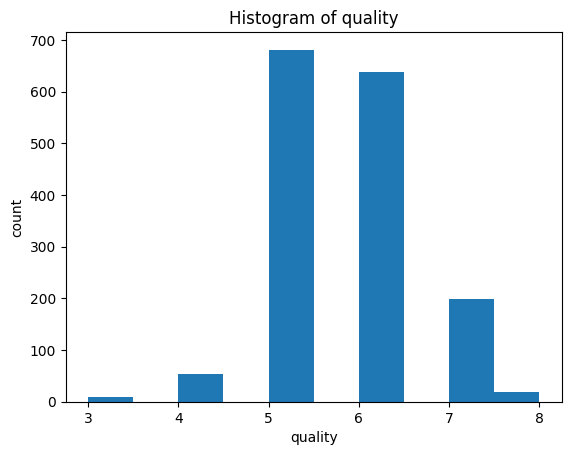

In [8]:
plt.hist(df_red_wine['quality'])
plt.ylabel('count')
plt.xlabel('quality')
plt.title('Histogram of quality')

In [ ]:
- Let take a look at independent variables.
- Three distinct patterns can be seen. For starters, there are positive correlations between quality and acid, alcohol, and 
  sulphates. Wines with a higher alcohol content may be less popular, but they should be highly rated in terms of quality. 
  Second, there are inverse correlations between quality and volatile. acidity, density, and pH. It stands to reason that less
  sweet wines with lower acidity are preferred in quality tests. Finally, residual.sugar, chlorides, and total.sulfur.dioxide 
  have no significant relationship with quality.

NameError: name 'np_red_features_reshaped' is not defined

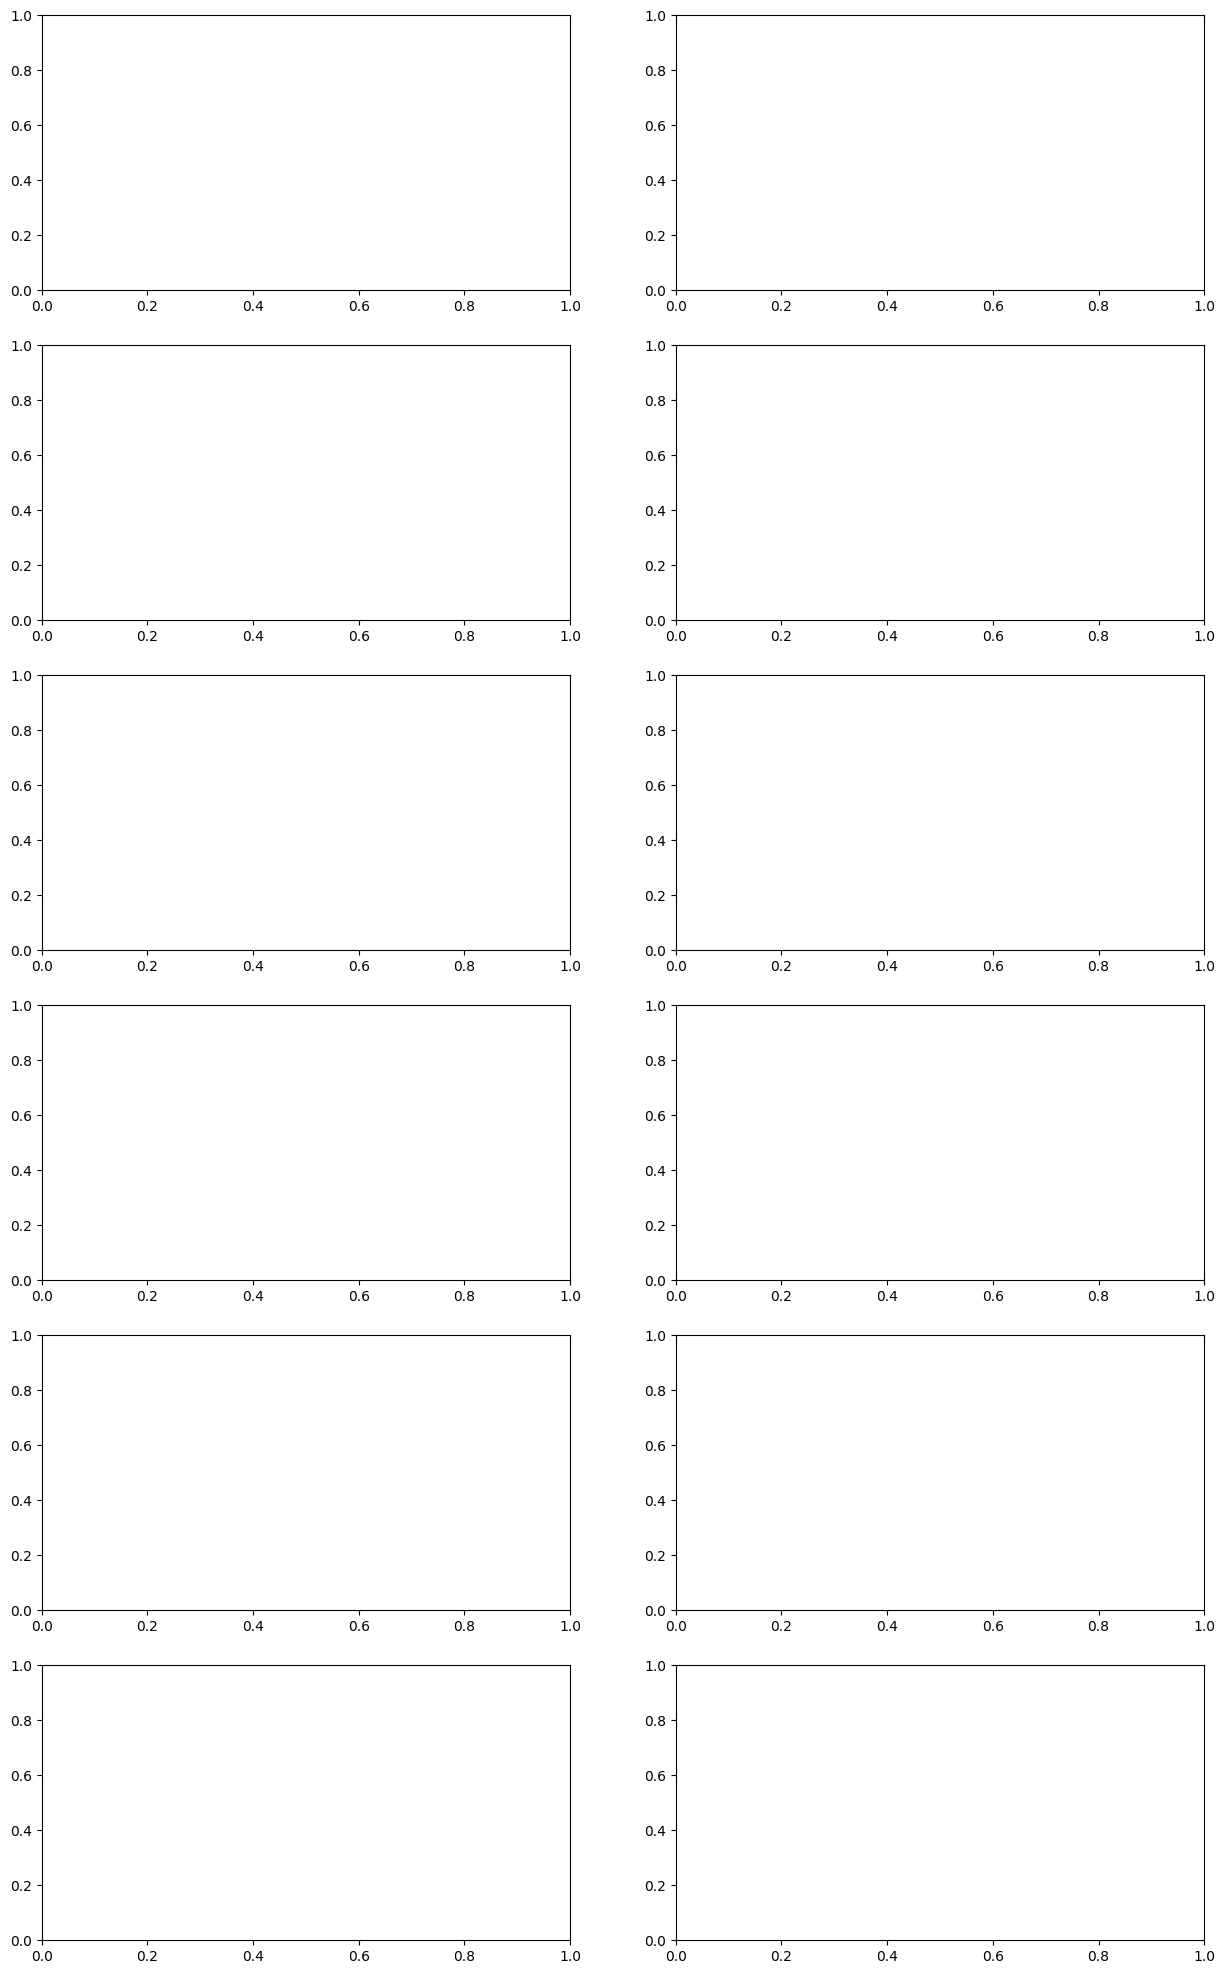

In [9]:
fig, axes = plt.subplots(6, 2, figsize=(15, 25))
for i in range(6):
    for j in range(2):
        sns.boxplot(x="quality", y=np_red_features_reshaped[i, j], data=df_red_wine, ax=axes[i, j])
        axes[i, j].set_title(f"Boxplot of quality vs. {np_red_features_reshaped[i, j]}")
fig.tight_layout()

In [ ]:
- Let look at 

In [ ]:
- Take a look at heatmap, we can see that there is a high correlation between alcohol, sulphates, citric acid, fixed acidity 
  and quality. 

In [ ]:
sns.heatmap(df_red_corr_matrix, cmap="Blues", linewidths=0.5, cbar=True)

> hl271

## 3. Suggest ML Algorithm to classify the wine's quality

### Approach 1: Convert to Regression Problem: 

- Suggested Model
    - Multiple Linear Regression Model
- Feature Selection: Choose 4-5 most correlated features to wine's quality (Ex: alcohol, acid_citric, sulphate, volatile acidity) 
- Round up the predicted quality to integer value

### Approach 2: Classification Problem

- For simplifying purpose, we can use **binary classification**: classify wine's quality is 
    - bad if quality <=5
    - good if quality >5
- Suggested Models:
    - Support Vector Classifier
    - Decision Tree/ Random Forest Classifier

> hl271

## 4. Suggest ML Algorithm to group wine based on its features
- This is a **Clustering** problem
- Suggested Model:
    - K-Means